SENTIMENT ANALYSIS:

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

Based on a scoring mechanism, sentiment analysis monitors conversations and evaluates language and voice inflections to quantify attitudes, opinions, and emotions related to a business, product or service, or topic. Sentiment analysis is sometimes also referred to as opinion mining. As part of the overall speech analytics system, sentiment analysis is the integral component that determines a customer’s opinions or attitudes.

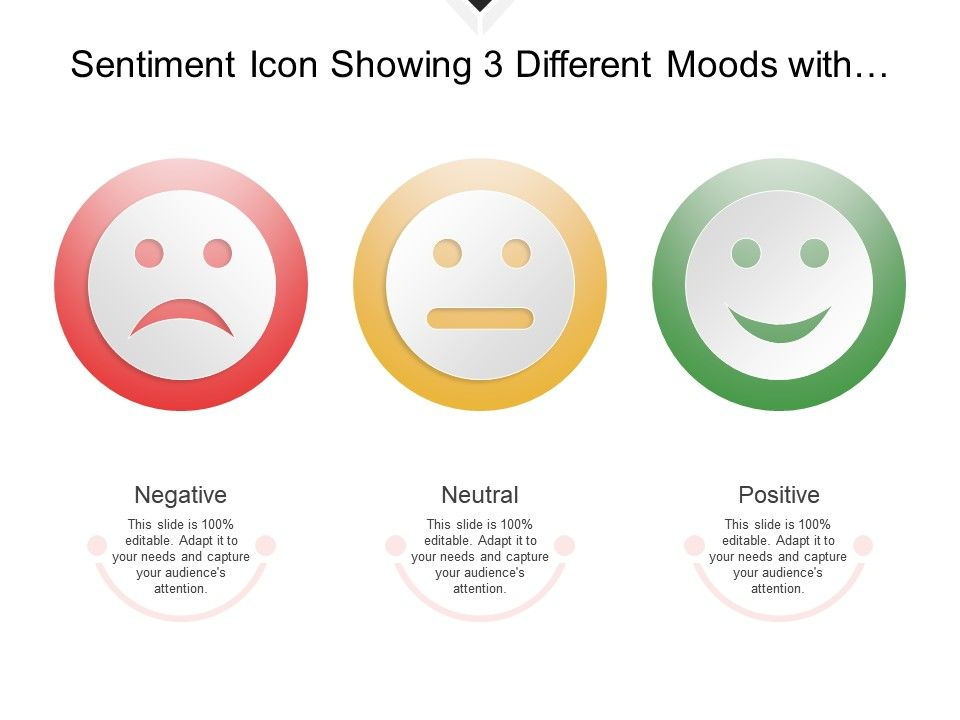


KERAS:

Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides.


Imported the keras estimators such as Preprocessers, models,layers.

GOOGLE'S TENSORFLOW also imported

In [1]:
import numpy
import pandas 
import tensorflow
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Loading the kears IMDB dataset already pre-integrated with training and testing data. 

In [2]:
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)




17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(x_train, y_train)


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 

In [4]:
print(x_test, y_test)

[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717])
 list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4

In [5]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [6]:
maxlen = 180
batch_size = 32

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 180)
x_test shape: (25000, 180)


To view the complete matrix

In [9]:
import numpy
with numpy.printoptions(threshold=numpy.inf):
    print(x_train[1])

[ 1463  4369  5012   134    26     4   715     8   118  1634    14   394
    20    13   119   954   189   102     5   207   110  3103    21    14
    69   188     8    30    23     7     4   249   126    93     4   114
     9  2300  1523     5   647     4   116     9    35  8163     4   229
     9   340  1322     4   118     9     4   130  4901    19     4  1002
     5    89    29   952    46    37     4   455     9    45    43    38
  1543  1905   398     4  1649    26  6853     5   163    11  3215 10156
     4  1153     9   194   775     7  8255 11596   349  2637   148   605
 15358  8003    15   123   125    68     2  6853    15   349   165  4362
    98     5     4   228     9    43     2  1157    15   299   120     5
   120   174    11   220   175   136    50     9  4373   228  8255     5
     2   656   245  2350     5     4  9837   131   152   491    18     2
    32  7464  1212    14     9     6   371    78    22   625    64  1382
     9     8   168   145    23     4  1690    15   

Creating a "tf.keras.Sequential" model and start with an embedding layer which store one vector per word.It convert sequences of word indicies to sequences of vectors.These vectors are trainable.
It followed by LSTM layer it is belongs to RNN.RNN has a drawback of Short term memory storage.If a sequence is long enough, they have a hard time carrying information from earlier time steps to later ones.So, adding an LSTM layer with dropout of 0.2, reccurrent_dropout of 0.2.Then a Dense layer with sigmiod function.

In [10]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

This is a binary classification problem and the model outputs logits (a single-unit layer with a linear activation), we'll use the binary_crossentropy loss function. It is better for dealing with probabilities—it measures the "distance" between probability distributions, or in our |case, between the ground-truth distribution and the predictions

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL FIT/TEST SCORE

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=8,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)

Epoch 1/8
782/782 [==============================] - 496s 634ms/step - loss: 0.4290 - accuracy: 0.7986 - val_loss: 0.3182 - val_accuracy: 0.8651
Epoch 2/8
782/782 [==============================] - 494s 632ms/step - loss: 0.2481 - accuracy: 0.9045 - val_loss: 0.4956 - val_accuracy: 0.8338
Epoch 3/8
782/782 [==============================] - 485s 620ms/step - loss: 0.1569 - accuracy: 0.9423 - val_loss: 0.3618 - val_accuracy: 0.8560
Epoch 4/8
782/782 [==============================] - 489s 626ms/step - loss: 0.1222 - accuracy: 0.9572 - val_loss: 0.4114 - val_accuracy: 0.8567
Epoch 5/8
782/782 [==============================] - 489s 625ms/step - loss: 0.0799 - accuracy: 0.9722 - val_loss: 0.5466 - val_accuracy: 0.8520
Epoch 6/8
782/782 [==============================] - 491s 627ms/step - loss: 0.0559 - accuracy: 0.9818 - val_loss: 0.5893 - val_accuracy: 0.8504
Epoch 7/8
782/782 [==============================] - 490s 627ms/step - loss: 0.0451 - accuracy: 0.9851 - val_loss: 0.5659 - val_ac

Using kears, A function to input text encode and decode

In [14]:
import keras
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], maxlen)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

1654784/1641221 [==============================] - 0s 0us/step
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  12  17  13  40 477  35 477]


ENCODE

In [15]:
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]
  
print(decode_integers(encoded))

that movie was just amazing so amazing


DECODE

In [16]:
import numpy as np
def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,180))
  pred[0] = encoded_text
  result = model.predict(pred) 
  print(result[0])

PREDICT AN REVIEW

In [18]:
positive_review = "That movie not loved"
x = predict(positive_review)


[0.185637]


In [19]:
negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predictions = predict(negative_review)

[0.03698999]
